# WF-samples start here

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import xlrd
import numpy as np

mapp='WF'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    print("Number of modified peptides in "+file+" "+str(len(data.index)))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data

total_number_of_peptides=len(df.index)
df = df.loc[(df['#Feature'] >= 4)] # sorts out if feature<4
df['count'] = 1
df = df.groupby(['Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4]) #this can be changed to view different amounts of AA
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df = df[['Peptide', 'Mass', 'Length', 'RT', '#Feature', '#Feature WF1','#Feature WF2', '#Feature WF 3', '#Feature WF4','#Feature WF5','count', 'N-cut', 'C-cut']]
df['Mass']=df['Mass']/df['count']
df['Length']=df['Length']/df['count']
df['RT']=df['RT']/df['count']
df = df.sort_values(['count','#Feature'], ascending=False)

print("Average length: "+str(df['Length'].mean()))
print("Average mass: "+str(df['Mass'].mean()))
print("Total number of peptides: "+str(total_number_of_peptides))
print("Number of peptides with feature>=4: "+str(len(df.index))+", in percent: "+str(100*(len(df.index))/(total_number_of_peptides))+" %")
df.head()

Number of modified peptides in peptide _WF1.xlsx 3687
Number of un-modified peptides in peptide _WF1.xlsx 3140
Number of modified peptides in peptide_WF2.xlsx 4220
Number of un-modified peptides in peptide_WF2.xlsx 3637
Number of modified peptides in peptide_WF3.xlsx 2960
Number of un-modified peptides in peptide_WF3.xlsx 2564
Number of modified peptides in peptide_WF4.xlsx 2423
Number of un-modified peptides in peptide_WF4.xlsx 2094
Number of modified peptides in peptide_WF5.xlsx 3367
Number of un-modified peptides in peptide_WF5.xlsx 2920
Average length: 12.688956433637285
Average mass: 1407.546652841664
Total number of peptides: 14355
Number of peptides with feature>=4: 1974, in percent: 13.751306165099269 %


,Peptide,Mass,Length,RT,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count,N-cut,C-cut
Accession,,,,,,,,,,,,,
sp|Q04206|TF65_HUMAN,PSLQAPVR,866.595800,8.0,14.917000,161,23.0,8.0,38.0,53.0,38.0,5,PSLQ,APVR
sp|P04406|G3P_HUMAN,AVGKVIPELNGKLTGMAF,1859.410673,18.0,73.682667,67,12.0,13.0,16.0,18.0,8.0,5,AVGK,GMAF
sp|P06727|APOA4_HUMAN,NHQLEGLTF,1058.240900,9.0,65.527167,66,10.0,15.0,13.0,15.0,13.0,5,NHQL,GLTF
sp|P06727|APOA4_HUMAN,SLAELGGHLDQQVEEF,1771.564000,16.0,99.716833,66,16.0,13.0,11.0,14.0,12.0,5,SLAE,VEEF
sp|Q14624|ITIH4_HUMAN,NFRPGVL,801.941700,7.0,39.656000,61,13.0,13.0,14.0,9.0,12.0,5,NFRP,PGVL


In [91]:
def group(list):
    grouped=[]
    nonpolar=['G','A','V','L','I','P','F','W','M']
    polar=['S','T','C','Y','N','Q']
    basic=['K','R','H']
    acidic=['D','E']
    for item in list:
        new_item=''
        for letter in item:
            if letter in nonpolar:
                new_item+='N'
            if letter in polar:
                new_item+='P'
            if letter in basic:
                new_item+='B'
            if letter in acidic:
                new_item+='A'
        grouped.append(new_item)
    return grouped

def get_letter_frequency(list):
    letters={
        'A':0,
        'G':0,
        'V':0,
        'L':0,
        'I':0,
        'P':0,
        'F':0,
        'W':0,
        'M':0,
        'S':0,
        'T':0,
        'C':0,
        'Y':0,
        'N':0,
        'Q':0,
        'K':0,
        'R':0,
        'H':0,
        'D':0,
        'E':0
    }
    for word in list:
        for letter in word:
            letters[letter] +=1
    return letters
get_letter_frequency(df['Peptide'])

{'A': 1625,
 'G': 2165,
 'V': 1862,
 'L': 2767,
 'I': 950,
 'P': 1815,
 'F': 1576,
 'W': 164,
 'M': 470,
 'S': 1793,
 'T': 1466,
 'C': 0,
 'Y': 605,
 'N': 826,
 'Q': 950,
 'K': 1041,
 'R': 556,
 'H': 560,
 'D': 1546,
 'E': 2311}

### How does feature and count correlate in these samples? Are there certain peptides with abnormal feature?

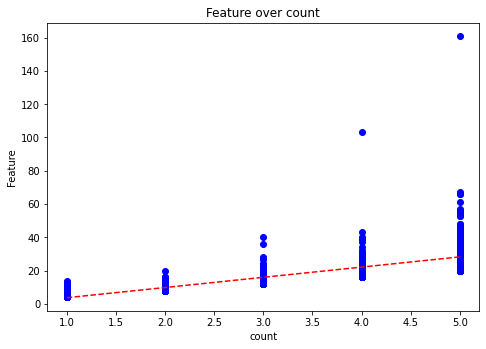

[ 6.12735666 -2.34968614]


In [86]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['count'], df['#Feature'], color='b')
z = np.polyfit(df['count'], df['#Feature'], 1)
p = np.poly1d(z)
plt.plot(df['count'],p(df['count']),"r--")
ax.set_xlabel('count')
ax.set_ylabel('Feature')
ax.set_title('Feature over count')
plt.show()
print(z)

In [93]:
df.sort_values(['#Feature'], ascending=False).head()

,Peptide,Mass,Length,RT,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count,N-cut,C-cut
Accession,,,,,,,,,,,,,
sp|Q04206|TF65_HUMAN,PSLQAPVR,866.595800,8.0,14.917000,161,23.0,8.0,38.0,53.0,38.0,5,PSLQ,APVR
sp|P01009|A1AT_HUMAN,AVLTIDEKGTEAAGAMF,1738.844700,17.0,67.552500,103,6.0,0.0,47.0,12.0,38.0,4,AVLT,GAMF
sp|P04406|G3P_HUMAN,AVGKVIPELNGKLTGMAF,1859.410673,18.0,73.682667,67,12.0,13.0,16.0,18.0,8.0,5,AVGK,GMAF
sp|P06727|APOA4_HUMAN,NHQLEGLTF,1058.240900,9.0,65.527167,66,10.0,15.0,13.0,15.0,13.0,5,NHQL,GLTF
sp|P06727|APOA4_HUMAN,SLAELGGHLDQQVEEF,1771.564000,16.0,99.716833,66,16.0,13.0,11.0,14.0,12.0,5,SLAE,VEEF


### What are the most frequent N,C-terminals and what is their sequence? How often are they found? Are there outliers? OOPS: Mass length etc are fucked

In [94]:
#Here we sort on the C and N-cut
df_N=df.groupby(['Accession', 'N-cut']).sum()
df_N['Mass']=df_N['Mass']/df_N['count']
df_N['Length']=df_N['Length']/df_N['count']
df_N['RT']=df_N['RT']/df_N['count']
df_N=df_N.sort_values(['count'], ascending=False)

#sorted by accession and then C-cut. KGEE is found 48 times in APOC2
df_C=df.groupby(['Accession', 'C-cut']).sum()
df_C['Mass']=df_C['Mass']/df_C['count']
df_C['Length']=df_C['Length']/df_C['count']
df_C['RT']=df_C['RT']/df_C['count']
df_C=df_C.sort_values(['count'], ascending=False)

df_C


Mass     Length          RT  #Feature  \
Accession             C-cut                                                 
sp|P02671|FIBA_HUMAN  GEFV    576.165453   5.191489   35.849035       226   
sp|P02655|APOC2_HUMAN KGEE    530.468101   4.826087   28.869676       289   
sp|P69905|HBA_HUMAN   RMFL    468.089084   4.157895   24.365303       264   
sp|P06727|APOA4_HUMAN VEEF    328.582763   2.857143   13.372717       248   
sp|P02671|FIBA_HUMAN  FSPM    450.405767   4.088235   25.697973       168   
...                                  ...        ...         ...       ...   
sp|P07358|CO8B_HUMAN  LMPI    989.510300   9.000000   77.910000         4   
sp|P07951|TPM2_HUMAN  ADKY   1023.487200   9.000000   15.580000         4   
                      AEQA   1471.726700  13.000000   14.930000         5   
                      AQER   1883.478100  15.000000   44.780000         4   
sp|Q9Y6W5|WASF2_HUMAN GFQL   1446.783100  13.000000  112.620000         4   

                             #Feature WF1  #Feature WF2  #Feature WF 3  \
Accession             C-cut                                              
sp|P02671|FIBA_HUMAN  GEFV           48.0          46.0           57.0   
sp|P02655|APOC2_HUMAN KGEE           61.0          59.0           61.0   
sp|P69905|HBA_HUMAN   RMFL           56.0          48.0           79.0   
sp|P06727|APOA4_HUMAN VEEF           46.0          51.0           53.0   
sp|P02671|FIBA_HUMAN  FSPM           40.0          51.0           33.0   
...                                   ...           ...            ...   
sp|P07358|CO8B_HUMAN  LMPI            0.0           4.0            0.0   
sp|P07951|TPM2_HUMAN  ADKY            0.0           4.0            0.0   
                      AEQA            0.0           0.0            0.0   
                      AQER            0.0           0.0            4.0   
sp|Q9Y6W5|WASF2_HUMAN GFQL            0.0           4.0            0.0   

                             #Feature WF4  #Feature WF5  count  
Accession             C-cut                                     
sp|P02671|FIBA_HUMAN  GEFV           42.0          33.0     47  
sp|P02655|APOC2_HUMAN KGEE           45.0          63.0     46  
sp|P69905|HBA_HUMAN   RMFL           24.0          57.0     38  
sp|P06727|APOA4_HUMAN VEEF           55.0          43.0     35  
sp|P02671|FIBA_HUMAN  FSPM           19.0          25.0     34  
...                                   ...           ...    ...  
sp|P07358|CO8B_HUMAN  LMPI            0.0           0.0      1  
sp|P07951|TPM2_HUMAN  ADKY            0.0           0.0      1  
                      AEQA            0.0           5.0      1  
                      AQER            0.0           0.0      1  
sp|Q9Y6W5|WASF2_HUMAN GFQL            0.0           0.0      1  

[1128 rows x 10 columns]

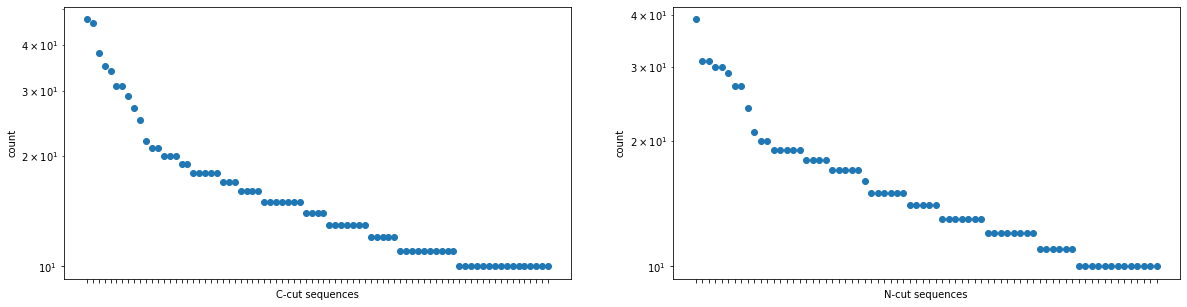

In [98]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.

#df_N.reset_index(['Accession'], inplace=True)
#df_C.reset_index(['Accession'], inplace=True)
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[1].set_yscale('log')           
ax[0].set_yscale('log')  
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut sequences')
ax[1].set_xlabel('N-cut sequences')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0, kanske mer relevant att kolla mot feature? Annars tittar vi mot "variation"
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0


### What are the most frequent groups of AA at the N,C-terminal? Are there any favoured combinations?

In [99]:
#This adds the N/C-grouped column when df is grouped mainly on protein, although the index is removed, and then on N/C-cutsite which is kept. 
#It is therefore still indirectly sorted on protein. There is no "respective peptide" available, although this can be easily added by sorting on Peptide aswell.

#might be an easier way to code

df_N= df.groupby(['Accession','N-cut']).sum() #groups original DataFrame by protein and n-cut. Makes protein and cut indexes
df_N = df_N.sort_values(['count','#Feature'], ascending=False) #sorts these values by count and feature
df_N.reset_index(['Accession'], inplace=True) #removes protein from index, only cut left
df_N['N-grouped']=group(df_N.index) #creates column of N-grouped based on index, cut

df_N=df_N.groupby(['N-grouped']).sum() #groups by N-grouped instead

df_N=df_N.sort_values(['count','#Feature'], ascending=False) #sorts the grouped index on count and feature

df_C = df.groupby(['Accession','C-cut']).sum() 
df_C = df_C.sort_values(['count','#Feature'], ascending=False)
df_C.reset_index(['Accession'], inplace=True)
df_C['C-grouped']=group(df_C.index)

df_C=df_C.groupby(['C-grouped']).sum()


df_C=df_C.sort_values(['count','#Feature'], ascending=False)
df_C

,Mass,Length,RT,#Feature,#Feature WF1,#Feature WF2,#Feature WF 3,#Feature WF4,#Feature WF5,count
C-grouped,,,,,,,,,,
NNNN,159173.092023,1479.0,8250.401417,1307,262.0,247.0,287.0,176.0,333.0,247
NPNN,156713.157905,1443.0,7881.437167,1012,224.0,312.0,184.0,132.0,160.0,216
NANN,122915.739050,1131.0,7123.973000,709,142.0,167.0,160.0,121.0,119.0,156
PNNN,90071.672800,826.0,5121.122750,593,102.0,150.0,99.0,85.0,157.0,138
NNPN,75170.088450,692.0,4232.614000,652,131.0,159.0,162.0,90.0,110.0,132
...,...,...,...,...,...,...,...,...,...,...
NPBP,1841.890700,16.0,22.950000,4,0.0,0.0,0.0,4.0,0.0,1
PABP,1016.492700,9.0,26.610000,4,0.0,0.0,0.0,0.0,4.0,1
PBPP,1325.636400,11.0,22.010000,4,0.0,4.0,0.0,0.0,0.0,1


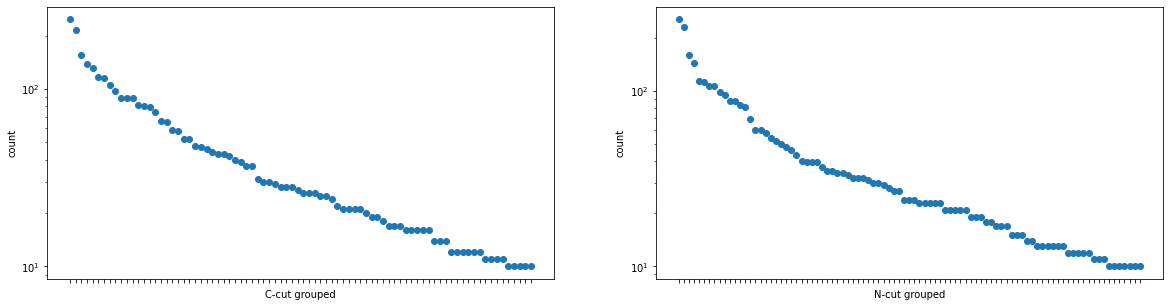

In [100]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[1].set_yscale('log')           
ax[0].set_yscale('log')  
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut grouped')
ax[1].set_xlabel('N-cut grouped')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0


# Infected samples start here

In [105]:
# !!NOW STARTS THE ANALYSIS OF THE INFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE INFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE INFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE INFECTED PATIENTS!!

mapp='peptide_sample_inf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    print("Number of modified peptides in "+file+" "+str(len(data.index)))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data

total_number_of_peptides=total_number_of_peptides=len(df.index)
df = df.loc[(df['#Feature'] >= 4)] # sorts out if feature<4
df['count'] = 1
df = df.groupby(['Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4])
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df = df[['Peptide', 'Mass', 'Length', 'RT', '#Feature', '#Feature Sample 31','#Feature Sample 34', '#Feature Sample 39','count', 'N-cut', 'C-cut']]
df['Mass']=df['Mass']/df['count']
df['Length']=df['Length']/df['count']
df['RT']=df['RT']/df['count']
df = df.sort_values(['count','#Feature'], ascending=False)
print("Average length: "+str(df['Length'].mean()))
print("Average mass: "+str(df['Mass'].mean()))
print("Total number of peptides: "+str(total_number_of_peptides))
print("Number of peptides with feature>=4: "+str(len(df.index))+", in percent: "+str(100*(len(df.index))/(total_number_of_peptides))+" %")
print(get_letter_frequency(df['Peptide']))
df.head()

Number of modified peptides in peptide_sample_31.xlsx 5103
Number of un-modified peptides in peptide_sample_31.xlsx 4055
Number of modified peptides in peptide_sample_34.xlsx 1412
Number of un-modified peptides in peptide_sample_34.xlsx 1218
Number of modified peptides in peptide_sample_39.xlsx 4929
Number of un-modified peptides in peptide_sample_39.xlsx 3817
Average length: 13.731363331094695
Average mass: 1494.5794611588155
Total number of peptides: 9090
Number of peptides with feature>=4: 1489, in percent: 16.38063806380638 %
{'A': 2463, 'G': 1754, 'V': 1856, 'L': 2015, 'I': 273, 'P': 1136, 'F': 874, 'W': 229, 'M': 275, 'S': 1221, 'T': 1118, 'C': 0, 'Y': 446, 'N': 747, 'Q': 440, 'K': 1484, 'R': 576, 'H': 1030, 'D': 1233, 'E': 1276}


,Peptide,Mass,Length,RT,#Feature,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,count,N-cut,C-cut
Accession,,,,,,,,,,,
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,1251.1440,12.0,86.333333,115,40.0,15.0,60.0,3,AGVA,HKYH
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,1179.9429,11.0,75.975000,109,42.0,12.0,55.0,3,GVAN,HKYH
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,1023.8530,9.0,59.131667,96,35.0,9.0,52.0,3,ANAL,HKYH
sp|P68871|HBB_HUMAN,VHLTPEEKSAV,1208.6400,11.0,50.666667,78,28.0,14.0,36.0,3,VHLT,KSAV
sp|P69905|HBA_HUMAN,STVLTSKYR,1053.5818,9.0,119.810000,77,21.0,15.0,41.0,3,STVL,SKYR


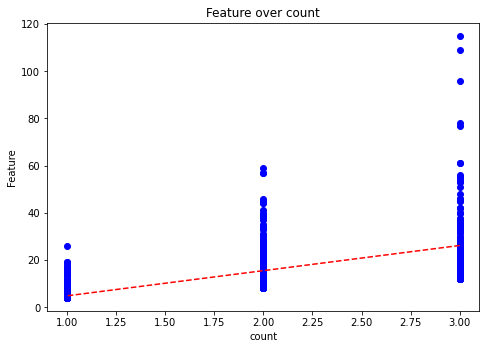

[10.675688   -5.88063833]


In [106]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['count'], df['#Feature'], color='b')
z = np.polyfit(df['count'], df['#Feature'], 1)
p = np.poly1d(z)
plt.plot(df['count'],p(df['count']),"r--")
ax.set_xlabel('count')
ax.set_ylabel('Feature')
ax.set_title('Feature over count')
plt.show()
print(z)

In [107]:
df.sort_values(['#Feature'], ascending=False).head()

,Peptide,Mass,Length,RT,#Feature,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,count,N-cut,C-cut
Accession,,,,,,,,,,,
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,1251.1440,12.0,86.333333,115,40.0,15.0,60.0,3,AGVA,HKYH
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,1179.9429,11.0,75.975000,109,42.0,12.0,55.0,3,GVAN,HKYH
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,1023.8530,9.0,59.131667,96,35.0,9.0,52.0,3,ANAL,HKYH
sp|P68871|HBB_HUMAN,VHLTPEEKSAV,1208.6400,11.0,50.666667,78,28.0,14.0,36.0,3,VHLT,KSAV
sp|P69905|HBA_HUMAN,STVLTSKYR,1053.5818,9.0,119.810000,77,21.0,15.0,41.0,3,STVL,SKYR


In [108]:
#Here we sort on the C and N-cut
df_N=df.groupby(['Accession', 'N-cut']).sum()
df_N['Mass']=df_N['Mass']/df_N['count']
df_N['Length']=df_N['Length']/df_N['count']
df_N['RT']=df_N['RT']/df_N['count']
df_N=df_N.sort_values(['count'], ascending=False)

#sorted by accession and then C-cut. KGEE is found 48 times in APOC2
df_C=df.groupby(['Accession', 'C-cut']).sum()
df_C['Mass']=df_C['Mass']/df_C['count']
df_C['Length']=df_C['Length']/df_C['count']
df_C['RT']=df_C['RT']/df_C['count']
df_C=df_C.sort_values(['count'], ascending=False)

df_N.head()

Mass     Length         RT  #Feature  \
Accession           N-cut                                                
sp|P69905|HBA_HUMAN VLSP   1091.134206  10.488372  37.897568       426   
                    TYFP   1315.041159  11.871795  55.779455       300   
                    FDLS    977.133533   9.424242  36.567727       230   
sp|P68871|HBB_HUMAN VHLT   1589.950285  14.645161  59.941290       301   
sp|P69905|HBA_HUMAN VGAH    686.245200   6.703704  33.781667       220   

                           #Feature Sample 31  #Feature Sample 34  \
Accession           N-cut                                           
sp|P69905|HBA_HUMAN VLSP                163.0                48.0   
                    TYFP                142.0                 5.0   
                    FDLS                 64.0                35.0   
sp|P68871|HBB_HUMAN VHLT                115.0                32.0   
sp|P69905|HBA_HUMAN VGAH                 66.0                33.0   

                           #Feature Sample 39  count  
Accession           N-cut                             
sp|P69905|HBA_HUMAN VLSP                215.0     43  
                    TYFP                153.0     39  
                    FDLS                131.0     33  
sp|P68871|HBB_HUMAN VHLT                154.0     31  
sp|P69905|HBA_HUMAN VGAH                120.0     27

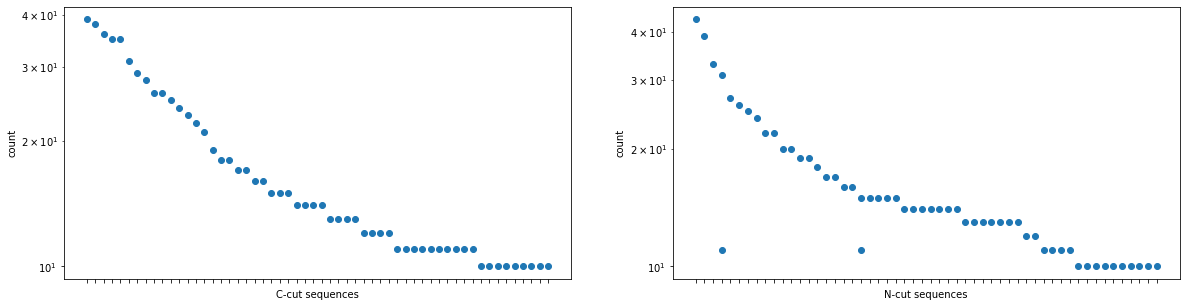

In [110]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.

df_N.reset_index(['Accession'], inplace=True)
df_C.reset_index(['Accession'], inplace=True)
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[1].set_yscale('log')           
ax[0].set_yscale('log')  
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut sequences')
ax[1].set_xlabel('N-cut sequences')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0, kanske mer relevant att kolla mot feature? Annars tittar vi mot "variation"
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0


In [111]:
#This adds the N/C-grouped column when df is grouped mainly on protein, although the index is removed, and then on N/C-cutsite which is kept. 
#It is therefore still indirectly sorted on protein. There is no "respective peptide" available, although this can be easily added by sorting on Peptide aswell.

#might be an easier way to code

df_N= df.groupby(['Accession','N-cut']).sum() #groups original DataFrame by protein and n-cut. Makes protein and cut indexes
df_N = df_N.sort_values(['count','#Feature'], ascending=False) #sorts these values by count and feature
df_N.reset_index(['Accession'], inplace=True) #removes protein from index, only cut left
df_N['N-grouped']=group(df_N.index) #creates column of N-grouped based on index, cut

df_N=df_N.groupby(['N-grouped']).sum() #groups by N-grouped instead

df_N=df_N.sort_values(['count','#Feature'], ascending=False) #sorts the grouped index on count and feature

df_C = df.groupby(['Accession','C-cut']).sum() 
df_C = df_C.sort_values(['count','#Feature'], ascending=False)
df_C.reset_index(['Accession'], inplace=True)
df_C['C-grouped']=group(df_C.index)

df_C=df_C.groupby(['C-grouped']).sum()


df_C=df_C.sort_values(['count','#Feature'], ascending=False)
df_C

,Mass,Length,RT,#Feature,#Feature Sample 31,#Feature Sample 34,#Feature Sample 39,count
C-grouped,,,,,,,,
NPNN,166146.044906,1575.0,9737.482194,1334,570.0,83.0,680.0,162
NNNB,92522.657425,882.0,4998.578333,593,236.0,63.0,294.0,108
BNNN,98349.823083,922.0,6009.355000,676,294.0,44.0,337.0,96
NNBN,93932.782167,896.0,5601.071667,515,229.0,29.0,257.0,89
NBNB,64608.068825,607.0,2112.773333,606,286.0,41.0,279.0,75
...,...,...,...,...,...,...,...,...
PBBN,965.460600,7.0,50.760000,4,4.0,0.0,0.0,1
PBPA,2045.940200,18.0,43.380000,4,0.0,0.0,4.0,1
PPAB,1089.483900,10.0,41.710000,4,4.0,0.0,0.0,1


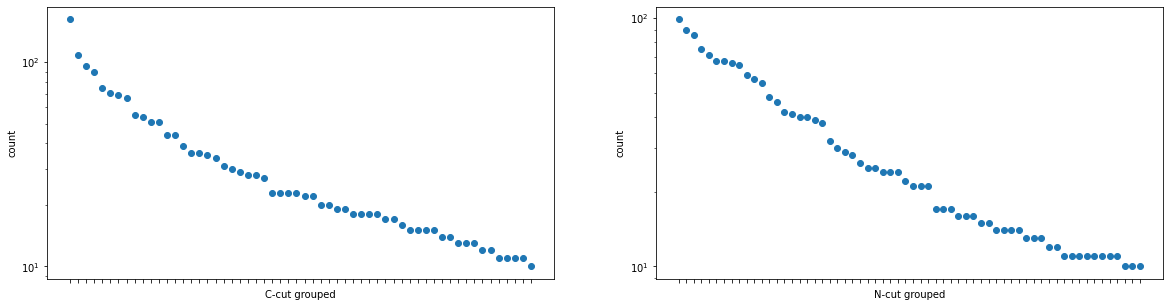

In [114]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[1].set_yscale('log')           
ax[0].set_yscale('log')  
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut grouped')
ax[1].set_xlabel('N-cut grouped')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0


# Non-infected samples start here

In [128]:
# !!NOW STARTS THE ANALYSIS OF THE NONINFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE NONINFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE NONINFECTED PATIENTS!!
# !!NOW STARTS THE ANALYSIS OF THE NONINFECTED PATIENTS!!

mapp='peptide_sample_ninf'
files = os.listdir(mapp)
# gets all xlsx files in cwd
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
df = pd.DataFrame()
for file in files_xlsx:
    data = pd.read_excel(mapp+ '/' +file, 'peptide')
    print("Number of modified peptides in "+file+" "+str(len(data.index)))
    data['Peptide']=data['Peptide'].str.replace('[^a-zA-Z]','')
    data['count']=1
    data = data.groupby(['Peptide','Accession'], as_index=False).sum()
    data['Mass']=data['Mass']/data['count']
    data['Length']=data['Length']/data['count']
    data['RT']=data['RT']/data['count']
    print("Number of un-modified peptides in "+file+" "+str(len(data.index)))
    df = df.append(data)  # appends all data

total_number_of_peptides=total_number_of_peptides=len(df.index)
df = df.loc[(df['#Feature'] >= 4)] # sorts out if feature<4
df['count'] = 1
df = df.groupby(['Accession','Peptide']).sum()
df.reset_index(['Peptide'], inplace=True)
df['N-cut']=df['Peptide'].apply(lambda x: x[0:4])
df['C-cut']=df['Peptide'].apply(lambda x: x[-4::1])
df = df[['Peptide', 'Mass', 'Length', 'RT', '#Feature', '#Feature Sample 13','#Feature Sample 21', '#Feature Sample 33','count', 'N-cut', 'C-cut']]
df['Mass']=df['Mass']/df['count']
df['Length']=df['Length']/df['count']
df['RT']=df['RT']/df['count']
df = df.sort_values(['count','#Feature'], ascending=False)

print("Average length: "+str(df['Length'].mean()))
print("Average mass: "+str(df['Mass'].mean()))
print("Total number of peptides: "+str(total_number_of_peptides))
print("Number of peptides with feature>=4: "+str(len(df.index))+", in percent: "+str(100*(len(df.index))/(total_number_of_peptides))+" %")
print(get_letter_frequency(df['Peptide']))
df.head()

Number of modified peptides in peptide_sample_13.xlsx 3146
Number of un-modified peptides in peptide_sample_13.xlsx 2638
Number of modified peptides in peptide_sample_21.xlsx 4863
Number of un-modified peptides in peptide_sample_21.xlsx 4076
Number of modified peptides in peptide_sample_33.xlsx 4277
Number of un-modified peptides in peptide_sample_33.xlsx 3476
Average length: 12.375892857142857
Average mass: 1352.1624395512686
Total number of peptides: 10190
Number of peptides with feature>=4: 1120, in percent: 10.991167811579981 %
{'A': 1357, 'G': 1204, 'V': 985, 'L': 1350, 'I': 304, 'P': 1112, 'F': 512, 'W': 72, 'M': 173, 'S': 1007, 'T': 637, 'C': 0, 'Y': 184, 'N': 465, 'Q': 458, 'K': 815, 'R': 583, 'H': 659, 'D': 850, 'E': 1134}


,Peptide,Mass,Length,RT,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count,N-cut,C-cut
Accession,,,,,,,,,,,
sp|P02671|FIBA_HUMAN,MELERPGGNEITR,1509.224925,13.0,55.168333,94,18.0,35.0,40.0,3,MELE,EITR
sp|P02671|FIBA_HUMAN,MELERPGGNEIT,1353.123825,12.0,64.688333,69,18.0,32.0,18.0,3,MELE,NEIT
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,1023.525000,9.0,57.370000,46,8.0,12.0,26.0,3,ANAL,HKYH
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,1179.778900,11.0,85.286667,46,13.0,13.0,20.0,3,GVAN,HKYH
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,AGVANALAHKYH,1250.652000,12.0,96.916667,41,11.0,12.0,18.0,3,AGVA,HKYH


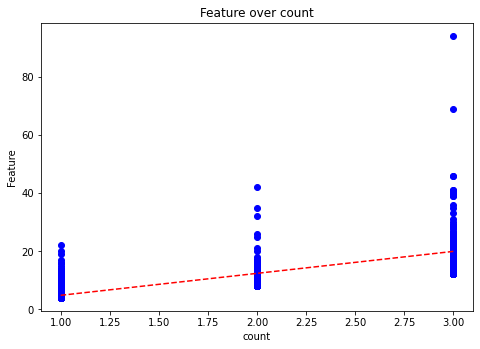

[ 7.55047414 -2.73092742]


In [119]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['count'], df['#Feature'], color='b')
z = np.polyfit(df['count'], df['#Feature'], 1)
p = np.poly1d(z)
plt.plot(df['count'],p(df['count']),"r--")
ax.set_xlabel('count')
ax.set_ylabel('Feature')
ax.set_title('Feature over count')
plt.show()
print(z)

In [118]:
df.sort_values(['#Feature'], ascending=False).head()

,Peptide,Mass,Length,RT,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count,N-cut,C-cut
Accession,,,,,,,,,,,
sp|P02671|FIBA_HUMAN,MELERPGGNEITR,1509.224925,13.0,55.168333,94,18.0,35.0,40.0,3,MELE,EITR
sp|P02671|FIBA_HUMAN,MELERPGGNEIT,1353.123825,12.0,64.688333,69,18.0,32.0,18.0,3,MELE,NEIT
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,ANALAHKYH,1023.525000,9.0,57.370000,46,8.0,12.0,26.0,3,ANAL,HKYH
sp|P68871|HBB_HUMAN:sp|P02042|HBD_HUMAN,GVANALAHKYH,1179.778900,11.0,85.286667,46,13.0,13.0,20.0,3,GVAN,HKYH
sp|P69905|HBA_HUMAN,AHVDDMPNALSALSDLHAH,2021.426875,19.0,95.971250,42,23.0,19.0,0.0,2,AHVD,LHAH


In [121]:
#Here we sort on the C and N-cut
df_N=df.groupby(['Accession', 'N-cut']).sum()
df_N['Mass']=df_N['Mass']/df_N['count']
df_N['Length']=df_N['Length']/df_N['count']
df_N['RT']=df_N['RT']/df_N['count']
df_N=df_N.sort_values(['count'], ascending=False)

#sorted by accession and then C-cut. KGEE is found 48 times in APOC2
df_C=df.groupby(['Accession', 'C-cut']).sum()
df_C['Mass']=df_C['Mass']/df_C['count']
df_C['Length']=df_C['Length']/df_C['count']
df_C['RT']=df_C['RT']/df_C['count']
df_C=df_C.sort_values(['count'], ascending=False)

df_N.head()

Mass    Length         RT  #Feature  \
Accession           N-cut                                              
sp|P69905|HBA_HUMAN VLSP   648.548268  6.272727  22.876894       134   
                    TYFP   786.648250  6.714286  50.468214       124   
                    VGAH   749.583491  7.300000  34.487125       130   
sp|P68871|HBB_HUMAN VHLT   886.985505  8.210526  38.841272       123   
sp|P69905|HBA_HUMAN LTNA   711.824793  6.750000  32.331812       145   

                           #Feature Sample 13  #Feature Sample 21  \
Accession           N-cut                                           
sp|P69905|HBA_HUMAN VLSP                 35.0                48.0   
                    TYFP                 19.0                48.0   
                    VGAH                 43.0                42.0   
sp|P68871|HBB_HUMAN VHLT                 31.0                47.0   
sp|P69905|HBA_HUMAN LTNA                 55.0                47.0   

                           #Feature Sample 33  count  
Accession           N-cut                             
sp|P69905|HBA_HUMAN VLSP                 51.0     22  
                    TYFP                 57.0     21  
                    VGAH                 45.0     20  
sp|P68871|HBB_HUMAN VHLT                 45.0     19  
sp|P69905|HBA_HUMAN LTNA                 43.0     16

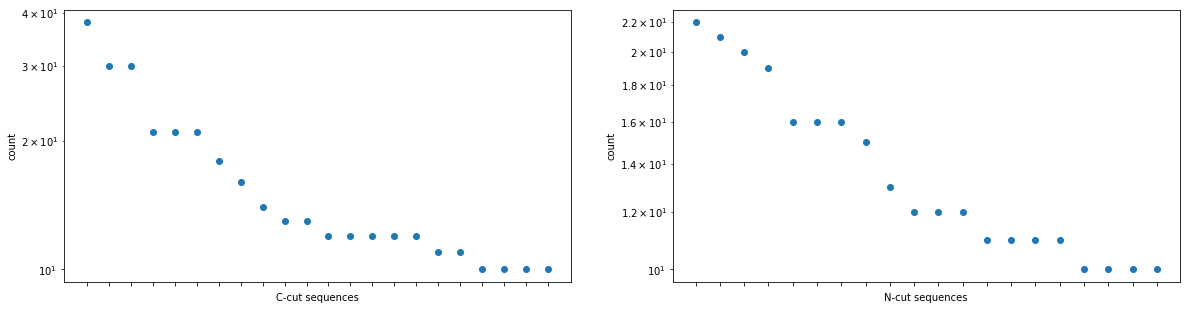

In [122]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.

df_N.reset_index(['Accession'], inplace=True)
df_C.reset_index(['Accession'], inplace=True)
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[1].set_yscale('log')           
ax[0].set_yscale('log')  
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut sequences')
ax[1].set_xlabel('N-cut sequences')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0, kanske mer relevant att kolla mot feature? Annars tittar vi mot "variation"
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0


In [123]:
#This adds the N/C-grouped column when df is grouped mainly on protein, although the index is removed, and then on N/C-cutsite which is kept. 
#It is therefore still indirectly sorted on protein. There is no "respective peptide" available, although this can be easily added by sorting on Peptide aswell.

#might be an easier way to code

df_N= df.groupby(['Accession','N-cut']).sum() #groups original DataFrame by protein and n-cut. Makes protein and cut indexes
df_N = df_N.sort_values(['count','#Feature'], ascending=False) #sorts these values by count and feature
df_N.reset_index(['Accession'], inplace=True) #removes protein from index, only cut left
df_N['N-grouped']=group(df_N.index) #creates column of N-grouped based on index, cut

df_N=df_N.groupby(['N-grouped']).sum() #groups by N-grouped instead

df_N=df_N.sort_values(['count','#Feature'], ascending=False) #sorts the grouped index on count and feature

df_C = df.groupby(['Accession','C-cut']).sum() 
df_C = df_C.sort_values(['count','#Feature'], ascending=False)
df_C.reset_index(['Accession'], inplace=True)
df_C['C-grouped']=group(df_C.index)

df_C=df_C.groupby(['C-grouped']).sum()


df_C=df_C.sort_values(['count','#Feature'], ascending=False)
df_C

,Mass,Length,RT,#Feature,#Feature Sample 13,#Feature Sample 21,#Feature Sample 33,count
C-grouped,,,,,,,,
NNNB,92080.889650,877.0,5319.004167,512,132.0,165.0,215.0,106
NBNB,62887.803990,591.0,2755.095833,604,207.0,273.0,122.0,76
NNPN,46277.953144,420.0,3054.548889,449,102.0,138.0,209.0,66
NNAB,46953.438750,431.0,1991.556667,303,84.0,94.0,125.0,53
NPNB,35663.566800,326.0,1648.471667,288,70.0,118.0,100.0,53
...,...,...,...,...,...,...,...,...
PBBB,1316.756500,11.0,16.290000,4,0.0,0.0,3.0,1
PNBB,987.452200,9.0,25.220000,4,0.0,0.0,4.0,1
PPAA,1479.695300,14.0,64.960000,4,0.0,0.0,4.0,1


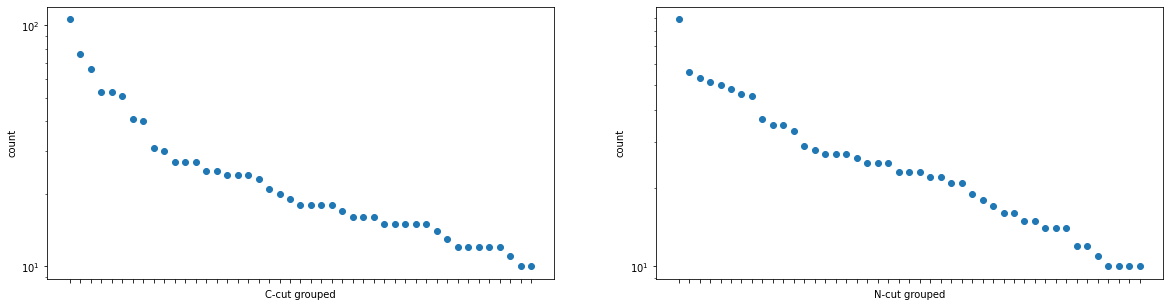

In [126]:
#These graphs show how the variation of N/C-GROUPS vary in a sample. As seen, it's not linear but exponential.
df_N = df_N.loc[(df_N['count'] >= 10)] 
df_C = df_C.loc[(df_C['count'] >= 10)] 
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[1].set_yscale('log')           
ax[0].set_yscale('log')  
ax[1].set_xticklabels([])
ax[0].set_xticklabels([])
ax[0].set_xlabel('C-cut grouped')
ax[1].set_xlabel('N-cut grouped')
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[1].scatter(df_N.index, df_N['count']) #row=0, col=0
ax[0].scatter(df_C.index, df_C['count']) #row=1, col=0
